In [1]:
library(data.table)
df_all=fread("E0.csv")
str(df_all)
df=df_all[,1:56]
class(df)
str(df)
summary(df)
library(ggplot2)

Classes ‘data.table’ and 'data.frame':	78 obs. of  106 variables:
 $ Div      : chr  "E0" "E0" "E0" "E0" ...
 $ Date     : chr  "12/09/2020" "12/09/2020" "12/09/2020" "12/09/2020" ...
 $ Time     : chr  "12:30" "15:00" "17:30" "20:00" ...
 $ HomeTeam : chr  "Fulham" "Crystal Palace" "Liverpool" "West Ham" ...
 $ AwayTeam : chr  "Arsenal" "Southampton" "Leeds" "Newcastle" ...
 $ FTHG     : int  0 1 4 0 0 0 1 0 5 4 ...
 $ FTAG     : int  3 0 3 2 3 1 3 2 2 3 ...
 $ FTR      : chr  "A" "H" "H" "A" ...
 $ HTHG     : int  0 1 3 0 0 0 0 0 2 2 ...
 $ HTAG     : int  1 0 2 0 0 0 1 2 1 1 ...
 $ HTR      : chr  "A" "H" "H" "D" ...
 $ Referee  : chr  "C Kavanagh" "Jj Moss" "M Oliver" "S Attwell" ...
 $ HS       : int  5 5 22 15 7 9 13 9 17 10 ...
 $ AS       : int  13 9 6 15 13 15 10 11 6 14 ...
 $ HST      : int  2 3 6 3 1 5 3 2 7 7 ...
 $ AST      : int  6 5 3 2 7 4 5 4 4 6 ...
 $ HF       : int  12 14 9 13 12 15 8 13 9 13 ...
 $ AF       : int  12 11 6 7 9 7 13 7 11 18 ...
 $ HC       : int  2 

[1] "data.table" "data.frame"

Classes ‘data.table’ and 'data.frame':	78 obs. of  56 variables:
 $ Div     : chr  "E0" "E0" "E0" "E0" ...
 $ Date    : chr  "12/09/2020" "12/09/2020" "12/09/2020" "12/09/2020" ...
 $ Time    : chr  "12:30" "15:00" "17:30" "20:00" ...
 $ HomeTeam: chr  "Fulham" "Crystal Palace" "Liverpool" "West Ham" ...
 $ AwayTeam: chr  "Arsenal" "Southampton" "Leeds" "Newcastle" ...
 $ FTHG    : int  0 1 4 0 0 0 1 0 5 4 ...
 $ FTAG    : int  3 0 3 2 3 1 3 2 2 3 ...
 $ FTR     : chr  "A" "H" "H" "A" ...
 $ HTHG    : int  0 1 3 0 0 0 0 0 2 2 ...
 $ HTAG    : int  1 0 2 0 0 0 1 2 1 1 ...
 $ HTR     : chr  "A" "H" "H" "D" ...
 $ Referee : chr  "C Kavanagh" "Jj Moss" "M Oliver" "S Attwell" ...
 $ HS      : int  5 5 22 15 7 9 13 9 17 10 ...
 $ AS      : int  13 9 6 15 13 15 10 11 6 14 ...
 $ HST     : int  2 3 6 3 1 5 3 2 7 7 ...
 $ AST     : int  6 5 3 2 7 4 5 4 4 6 ...
 $ HF      : int  12 14 9 13 12 15 8 13 9 13 ...
 $ AF      : int  12 11 6 7 9 7 13 7 11 18 ...
 $ HC      : int  2 7 9 8 2 5 4 12 11 5 

     Div                Date               Time             HomeTeam        
 Length:78          Length:78          Length:78          Length:78         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   AwayTeam              FTHG            FTAG           FTR           
 Length:78          Min.   :0.000   Min.   :0.000   Length:78         
 Class :character   1st Qu.:0.000   1st Qu.:1.000   Class :character  
 Mode  :character   Median :1.000   Median :1.000   Mode  :character  
                    Mean   :1.474   Mean   :1.667                     
                    3rd Qu.:2.000   3rd Qu.:3.000                     
                    Max.   :7.000  

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Task 1 (Histogram)

## Part 1.A
### Histogram for Home Score(Goals)

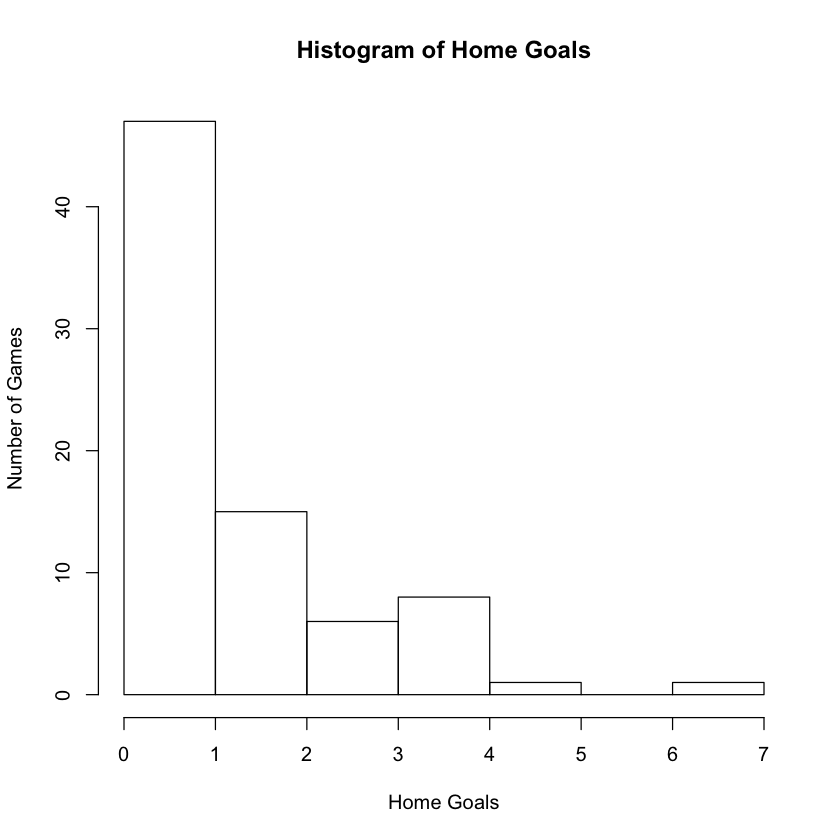

In [2]:
hist(df$FTHG, ylab="Number of Games", xlab="Home Goals",main="Histogram of Home Goals")

## Part 1.B
### Away Score(Goals)

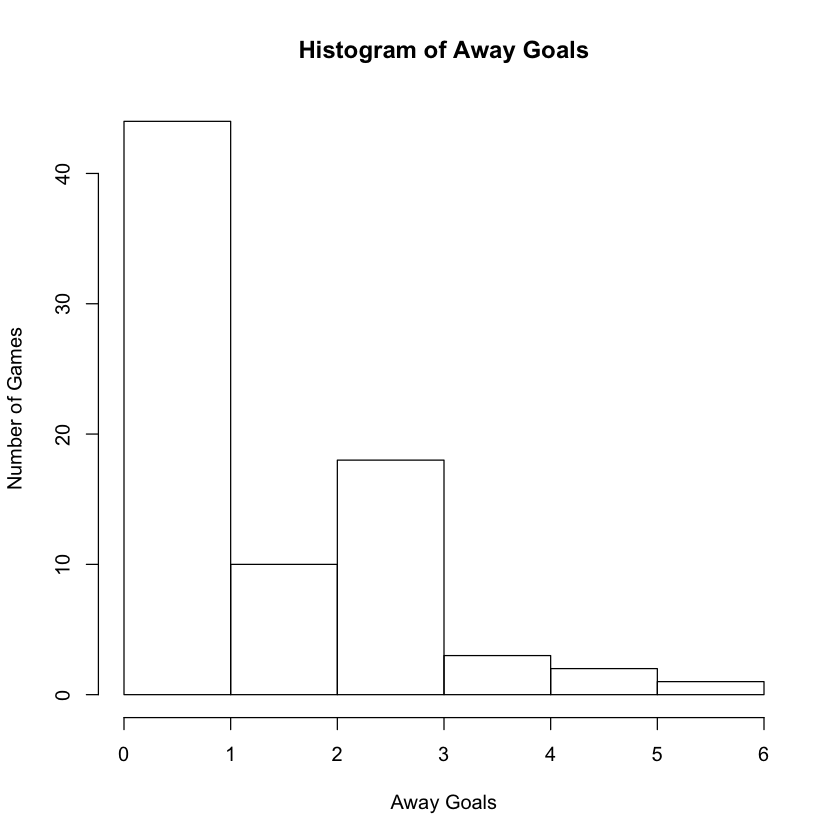

In [3]:
hist(df$FTAG, ylab="Number of Games", xlab="Away Goals",main="Histogram of Away Goals")

## Part 1.C
### Home Score(goals)– Away Score(goals)

Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'HHome goals – Away Goals' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'HHome goals – Away Goals' in 'mbcsToSbcs': dot substituted for <80>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'HHome goals – Away Goals' in 'mbcsToSbcs': dot substituted for <93>”

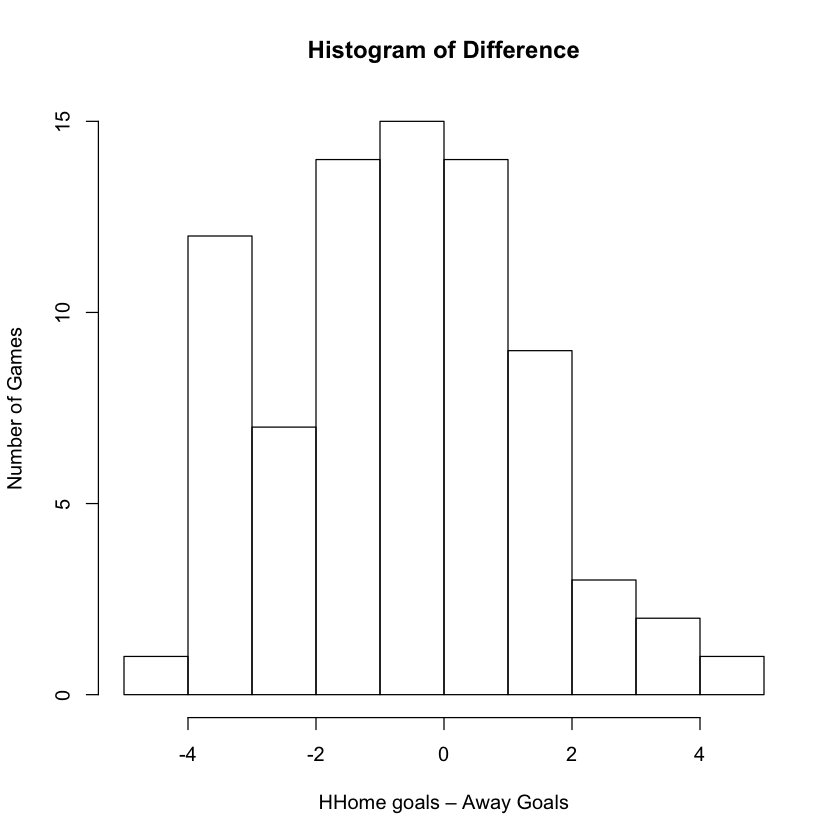

In [4]:
hist(df$FTHG-df$FTAG, ylab="Number of Games", xlab="HHome goals – Away Goals",
     main="Histogram of Difference")

## Part 2

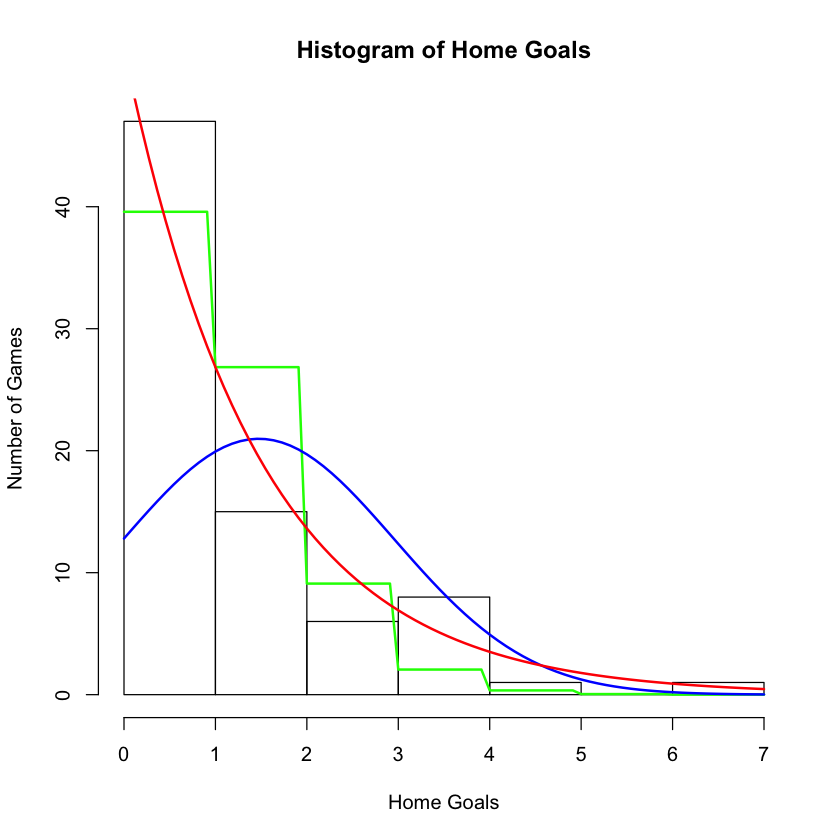

In [5]:
hist1<-hist(df$FTHG, ylab="Number of Games", xlab="Home Goals",main="Histogram of Home Goals")
x <- df$FTHG
xfit<-seq(min(x),max(x),length=78) 
yfit_pois<-dpois(as.integer(xfit),lambda=1/mean(x),log = FALSE)
yfit_pois<- yfit_pois*diff(hist1$mids[1:2])*length(x) 
lines(xfit, yfit_pois, col="green", lwd=2)

yfit_normal<-dnorm(xfit,mean=mean(x),sd=sd(x)) 
yfit_normal<- yfit_normal*diff(hist1$mids[1:2])*length(x) 
lines(xfit, yfit_normal, col="blue", lwd=2)

yfit_exponential<-dexp(xfit,rate=1/mean(x),log = FALSE) 
yfit_exponential <- yfit_exponential*diff(hist1$mids[1:2])*length(x) 
lines(xfit, yfit_exponential, col="red", lwd=2)

Blue line represents the Poisson distribution. By looking at the plot, it can be said that Poisson distribution one of the good option for Home Goals distribution. In addition, the red line was designated for the exponential distribution. The exponential distribution is much more convenient for representing the distribution of Home Goals. The worst one amoung options is the normal distribution for Home Goals.  

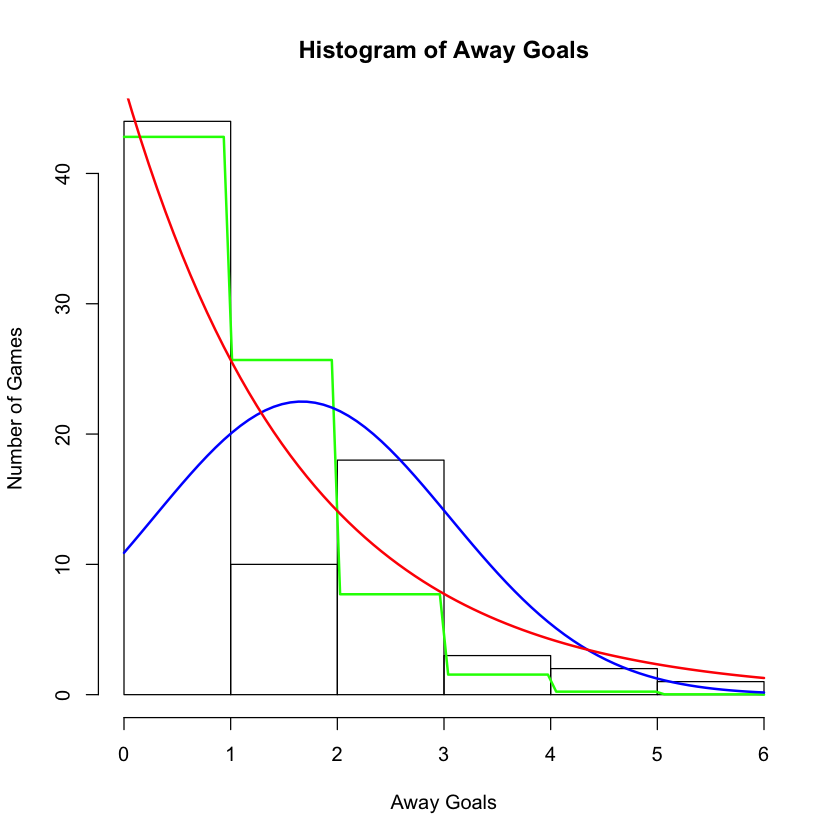

In [6]:
hist2<-hist(df$FTAG, ylab="Number of Games", xlab="Away Goals",main="Histogram of Away Goals")
x1 <- df$FTAG
xfit1<-seq(min(x1),max(x1),length=78) 
yfit1_pois<-dpois(as.integer(xfit1),lambda=1/mean(x1),log = FALSE)
yfit1_pois<- yfit1_pois*diff(hist2$mids[1:2])*length(x1) 
lines(xfit1, yfit1_pois, col="green", lwd=2)

yfit1_normal<-dnorm(xfit1,mean=mean(x1),sd=sd(x1)) 
yfit1_normal <- yfit1_normal*diff(hist2$mids[1:2])*length(x1) 
lines(xfit1, yfit1_normal, col="blue", lwd=2)

yfit1_exponential<-dexp(xfit1,rate=1/mean(x1),log = FALSE) 
yfit1_exponential <- yfit1_exponential*diff(hist2$mids[1:2])*length(x1) 
lines(xfit1, yfit1_exponential, col="red", lwd=2)

A similar situation for Home Goals is existing for Away Goals. Namely, Poisson distribution(green line) does not look proper for Away goal distribution, which can be observed by looking blue line in the plot. Again, Exponential distribution(red line) is one of the good options for the distribution of Away Goals. The worst one amoung options is the normal distribution for Away Goals.

## Task 2

In [7]:
df_Bet365=df[,c(8,23,24,25,26,27)]
df_BetAndWin=df[,c(8,23,24,28,29,30)]
df_Pinnacle=df[,c(8,23,24,34,35,36)]
df_IW=df[,c(8,23,24,31,32,33)]

4 different data frames were constructed by selecting proper columns(columns related to matches and each bookmaker) from the general data frame. These bookmakers can be listed as Bet 365, Bet and Win, Pinnacle, and IW. All the processes are made in those data frames.

## Part 1
### Calculation of P(home win), P(tie) and P(away win) 

#### Bet 365

In [8]:
df_Bet365$home_prob=1/df_Bet365$B365H
df_Bet365$draw_prob=1/df_Bet365$B365D
df_Bet365$away_prob=1/df_Bet365$B365A

#### Bet and Win

In [9]:
df_BetAndWin$home_prob=1/df_BetAndWin$BWH
df_BetAndWin$draw_prob=1/df_BetAndWin$BWD
df_BetAndWin$away_prob=1/df_BetAndWin$BWA

#### Pinnacle

In [10]:
df_Pinnacle$home_prob=1/df_Pinnacle$PSH
df_Pinnacle$draw_prob=1/df_Pinnacle$PSD
df_Pinnacle$away_prob=1/df_Pinnacle$PSA

#### IW

In [11]:
df_IW$home_prob=1/df_IW$IWH
df_IW$draw_prob=1/df_IW$IWD
df_IW$away_prob=1/df_IW$IWA

# Part 2
Again all probabilities were calculated for each bookmakers seperately. 
### Probabilities by using normalization formula
* Firstly, total probability(Home + Away + Draw) is calculated.
* Secondly, normalized probabilities are calculated by using total probability.

#### Bet 365

In [12]:
df_Bet365$total_prob=df_Bet365$home_prob+df_Bet365$draw_prob+df_Bet365$away_prob
df_Bet365$normalized_home_prob=(1/df_Bet365$B365H)/df_Bet365$total_prob
df_Bet365$normalized_draw_prob=(1/df_Bet365$B365D)/df_Bet365$total_prob
df_Bet365$normalized_away_prob=(1/df_Bet365$B365A)/df_Bet365$total_prob

#### Bet and Win

In [13]:
df_BetAndWin$total_prob=df_BetAndWin$home_prob+df_BetAndWin$draw_prob+df_BetAndWin$away_prob
df_BetAndWin$normalized_home_prob=(1/df_BetAndWin$BWH)/df_BetAndWin$total_prob
df_BetAndWin$normalized_draw_prob=(1/df_BetAndWin$BWD)/df_BetAndWin$total_prob
df_BetAndWin$normalized_away_prob=(1/df_BetAndWin$BWA)/df_BetAndWin$total_prob

#### Pinnacle

In [14]:
df_Pinnacle$total_prob=df_Pinnacle$home_prob+df_Pinnacle$draw_prob+df_Pinnacle$away_prob
df_Pinnacle$normalized_home_prob=(1/df_Pinnacle$PSH)/df_Pinnacle$total_prob
df_Pinnacle$normalized_draw_prob=(1/df_Pinnacle$PSD)/df_Pinnacle$total_prob
df_Pinnacle$normalized_away_prob=(1/df_Pinnacle$PSA)/df_Pinnacle$total_prob

#### IW

In [15]:
df_IW$total_prob=df_IW$home_prob+df_IW$draw_prob+df_IW$away_prob
df_IW$normalized_home_prob=(1/df_IW$IWH)/df_IW$total_prob
df_IW$normalized_draw_prob=(1/df_IW$IWD)/df_IW$total_prob
df_IW$normalized_away_prob=(1/df_IW$IWA)/df_IW$total_prob

## Part 3 (Plot probabilities) 
In this part, Bet 365 selected as first bookmaker. Which steps were done can be listed as:
* Difference between Home Probability and Away Probability calculated for each match.
* All calculated probabilities were assigned to a category. This categories values were also indicated by bins. 
* Results for matches were converted to numbers. Of the match finished as a draw, its value is 1. The others are 0.
* Finally, a plot was constructed by considering probabilities and actual probabilities(bins) of matches.

In [16]:
library(comprehenr)

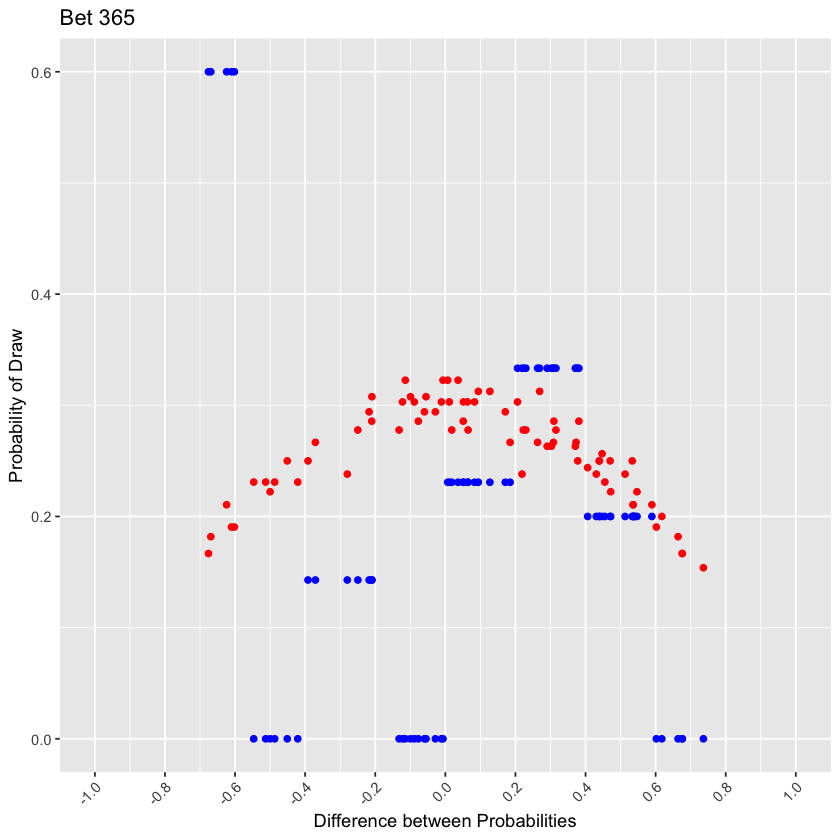

In [17]:
a<-seq(-1,0.8,by=0.2)
df_Bet365$diff=df_Bet365$home_prob-df_Bet365$away_prob
df_Bet365$categ<-to_vec(for(posi in 1:78) for(i in a) 
  if(i>(df_Bet365$home_prob[posi]-df_Bet365$away_prob[posi]) && 
     i<=(df_Bet365$home_prob[posi]-df_Bet365$away_prob[posi]+0.2)) as.integer((i+1)/0.2)-1)

df_Bet365[categ==0, bins:="(-1, -0.8]"]
df_Bet365[categ==1, bins:="(-0.8, -0.6]"]
df_Bet365[categ==2, bins:="(-0.6, -0.4]"]
df_Bet365[categ==3, bins:="(-0.4, -0.2]"]
df_Bet365[categ==4, bins:="(-0.2, 0]"]
df_Bet365[categ==5, bins:="(0, 0.2]"]
df_Bet365[categ==6, bins:="(0.2, 0.4]"]
df_Bet365[categ==7, bins:="(0.4, 0.6]"]
df_Bet365[categ==8, bins:="(0.6, 0.8]"]
df_Bet365[categ==9, bins:="(0.8, 1]"]

df_Bet365[FTR=="D",draw:=1]
df_Bet365[FTR=="H",draw:=0]
df_Bet365[FTR=="A",draw:=0]
#determined_bins <- factor(c( "(-1, -0.8]", "(-0.8, -0.6]", "(-0.6, -0.4]","(-0.4, -0.2]",
    #              "(-0.2, 0]","(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]", "(0.8, 1]"),
     #           levels = c( "(-1, -0.8]", "(-0.8, -0.6]", "(-0.6, -0.4]","(-0.4, -0.2]",
      #                     "(-0.2, 0]","(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]", "(0.8, 1]"),
       #         ordered = T)
df_Bet365[,real_draw_prob:=mean(draw),by=categ]
#table(df_Bet365$bins,df_Bet365$draw)
ggplot(df_Bet365,aes(x=diff,y=draw_prob))+geom_point(color="red")+                        
  labs(x="Difference between Probabilities",y="Probability of Draw")+ggtitle("Bet 365")+ 
  geom_point(aes(x=diff, y=real_draw_prob),color="blue") + theme(axis.text.x = element_text(angle = 45,hjust = 1))+
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10),limits=c(-1,1))

### Result: 
    Actual probability(from sample result) for 2 bins are more than determined probabilites by the bookmaker.   For these bins, (-0.8, -0.6] is more reasonable for betting because its actual proability is higher than determined.

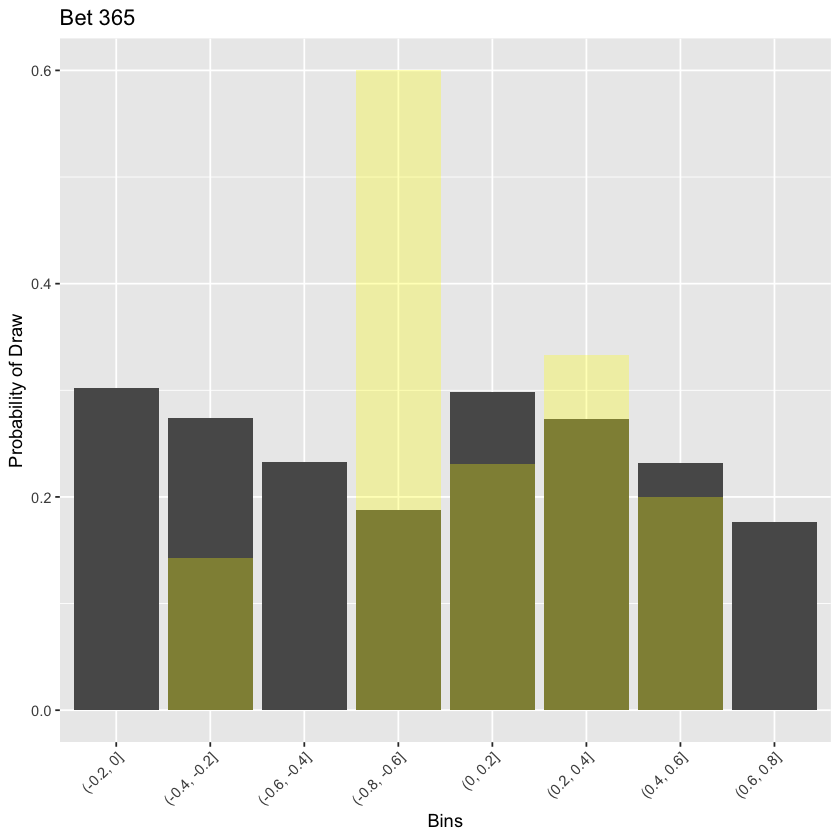

In [18]:
ggplot(df_Bet365,aes(x=bins,y=draw_prob))+ stat_summary(fun.y="mean", geom="bar")+
  labs(x="Bins",y="Probability of Draw")+ggtitle("Bet 365")+
  geom_bar(aes(x=bins, y=real_draw_prob),stat = "summary", fun.y = "mean",
           fill="yellow",alpha=.3) + theme(axis.text.x = element_text(angle = 45,hjust = 1))

In addition, one of the alternative visualization is added. By looking the bars, it is easier to understand which bins are proper for make profit. (-0.8, -0.6] is the most proper bins for betting, which caused from the difference between actual and mean of bookmaker's probability for this bin. Bookmaker determined the draw probability of this bin as less than 0.2(20%). However, there are 5 matches and 3 of them finished as draw. So, this bin is a good choice for make profit in long run by just looking this bookmaker.

## Part 4

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


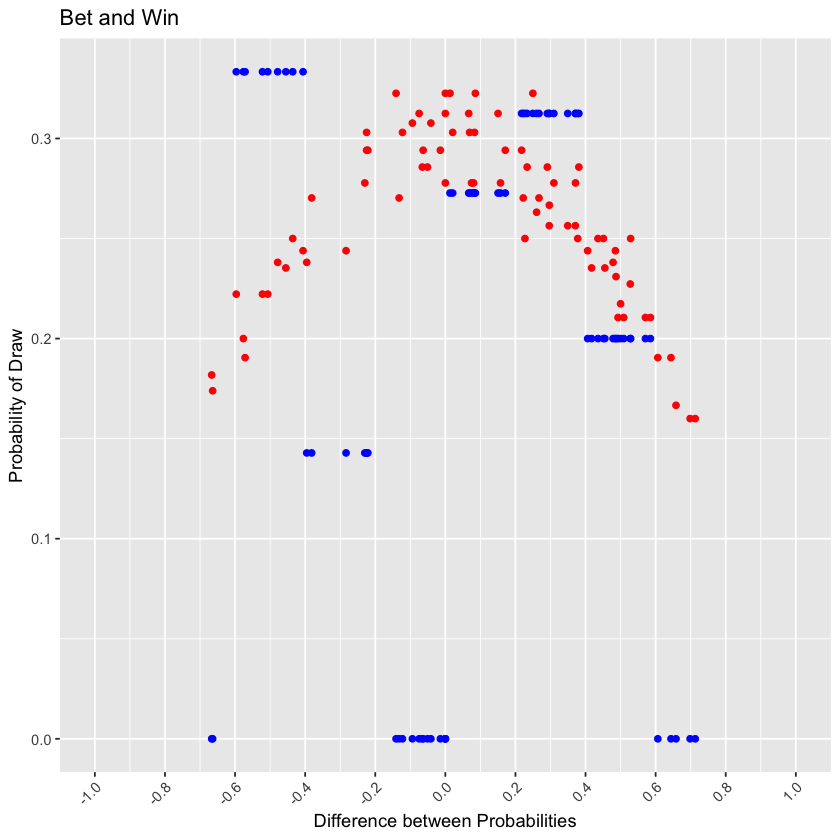

In [19]:
df_BetAndWin$diff=df_BetAndWin$home_prob-df_BetAndWin$away_prob
df_BetAndWin$categ<-to_vec(for(posi in 1:78) for(i in a) 
  if(i>=(df_BetAndWin$home_prob[posi]-df_BetAndWin$away_prob[posi]) && 
     i<(df_BetAndWin$home_prob[posi]-df_BetAndWin$away_prob[posi]+0.2)) as.integer((i+1)/0.2)-1)

df_BetAndWin[categ==0, bins:="(-1, -0.8]"]
df_BetAndWin[categ==1, bins:="(-0.8, -0.6]"]
df_BetAndWin[categ==2, bins:="(-0.6, -0.4]"]
df_BetAndWin[categ==3, bins:="(-0.4, -0.2]"]
df_BetAndWin[categ==4, bins:="(-0.2, 0]"]
df_BetAndWin[categ==5, bins:="(0, 0.2]"]
df_BetAndWin[categ==6, bins:="(0.2, 0.4]"]
df_BetAndWin[categ==7, bins:="(0.4, 0.6]"]
df_BetAndWin[categ==8, bins:="(0.6, 0.8]"]
df_BetAndWin[categ==9, bins:="(0.8, 1]"]

df_BetAndWin[FTR=="D",draw:=1]
df_BetAndWin[FTR=="H",draw:=0]
df_BetAndWin[FTR=="A",draw:=0]
determined_bins <- factor(c( "(-1, -0.8]", "(-0.8, -0.6]", "(-0.6, -0.4]","(-0.4, -0.2]",
                             "(-0.2, 0]","(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]", "(0.8, 1]"),
                          levels = c( "(-1, -0.8]", "(-0.8, -0.6]", "(-0.6, -0.4]","(-0.4, -0.2]",
                                      "(-0.2, 0]","(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]", "(0.8, 1]"),
                          ordered = T)
df_BetAndWin[,real_draw_prob:=mean(draw),by=categ]
ggplot(df_BetAndWin,aes(x=diff,y=draw_prob))+geom_point(color="red")+                        
  labs(x="Difference between Probabilities",y="Probability of Draw")+ggtitle("Bet and Win")+ xlim(-1,1)+
  geom_point(aes(x=diff, y=real_draw_prob),color="blue") + theme(axis.text.x = element_text(angle = 45,hjust = 1))+
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10),limits=c(-1,1))

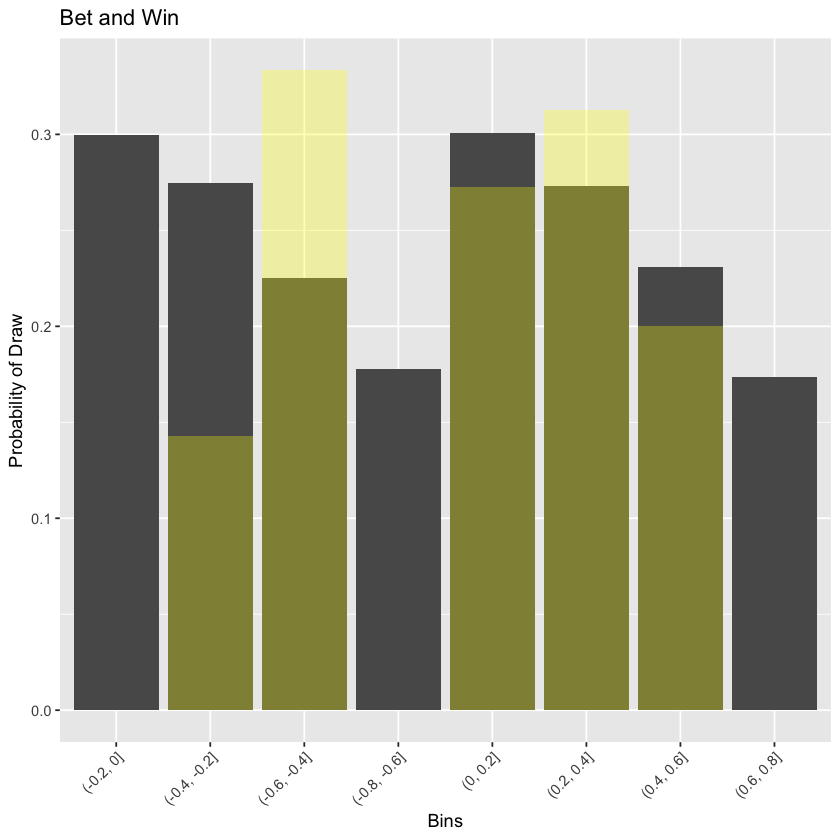

In [20]:
ggplot(df_BetAndWin,aes(x=bins,y=draw_prob))+ stat_summary(fun.y="mean", geom="bar")+
  labs(x="Bins",y="Probability of Draw")+ggtitle("Bet and Win")+
  geom_bar(aes(x=bins, y=real_draw_prob),stat = "summary", fun.y = "mean",
           fill="yellow",alpha=.3) + theme(axis.text.x = element_text(angle = 45,hjust = 1))

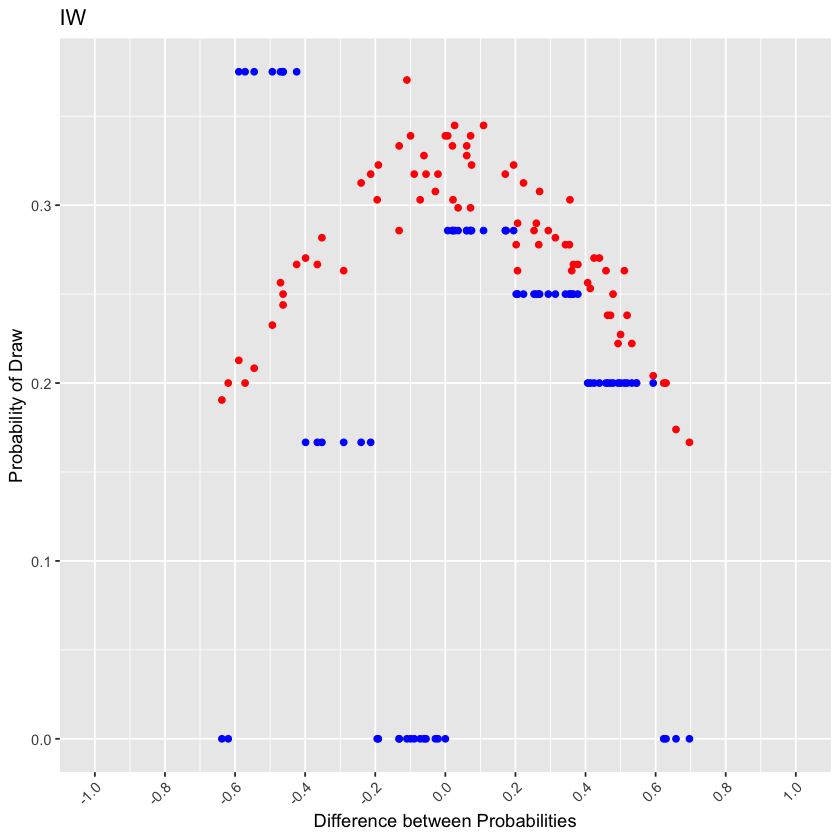

In [21]:
df_IW$diff=df_IW$home_prob-df_IW$away_prob
df_IW$categ<-to_vec(for(posi in 1:78) for(i in a) 
  if(i>=(df_IW$home_prob[posi]-df_IW$away_prob[posi]) && 
     i<(df_IW$home_prob[posi]-df_IW$away_prob[posi]+0.2)) as.integer((i+1)/0.2)-1)

df_IW[categ==0, bins:="(-1, -0.8]"]
df_IW[categ==1, bins:="(-0.8, -0.6]"]
df_IW[categ==2, bins:="(-0.6, -0.4]"]
df_IW[categ==3, bins:="(-0.4, -0.2]"]
df_IW[categ==4, bins:="(-0.2, 0]"]
df_IW[categ==5, bins:="(0, 0.2]"]
df_IW[categ==6, bins:="(0.2, 0.4]"]
df_IW[categ==7, bins:="(0.4, 0.6]"]
df_IW[categ==8, bins:="(0.6, 0.8]"]
df_IW[categ==9, bins:="(0.8, 1]"]

df_IW[FTR=="D",draw:=1]
df_IW[FTR=="H",draw:=0]
df_IW[FTR=="A",draw:=0]
determined_bins <- factor(c( "(-1, -0.8]", "(-0.8, -0.6]", "(-0.6, -0.4]","(-0.4, -0.2]",
                             "(-0.2, 0]","(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]", "(0.8, 1]"),
                          levels = c( "(-1, -0.8]", "(-0.8, -0.6]", "(-0.6, -0.4]","(-0.4, -0.2]",
                                      "(-0.2, 0]","(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]", "(0.8, 1]"),
                          ordered = T)
df_IW[,real_draw_prob:=mean(draw),by=categ]
#table(df_IW$bins,df_IW$draw)
ggplot(df_IW,aes(x=diff,y=draw_prob))+geom_point(color="red")+                        
  labs(x="Difference between Probabilities",y="Probability of Draw")+ggtitle("IW")+ 
  geom_point(aes(x=diff, y=real_draw_prob),color="blue") + theme(axis.text.x = element_text(angle = 45,hjust = 1))+
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10),limits=c(-1,1))

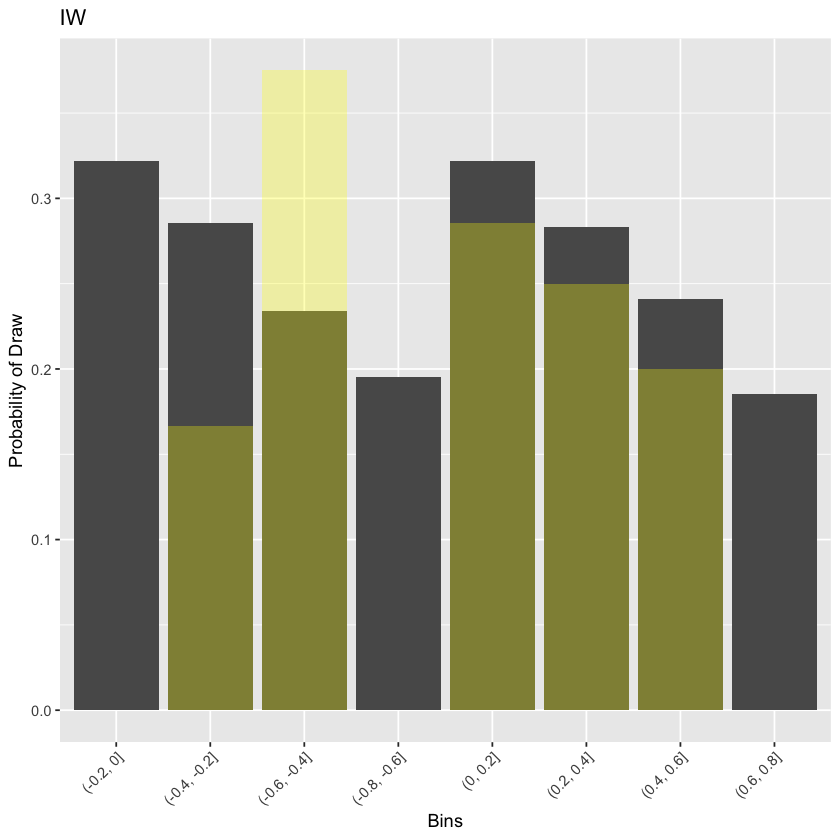

In [22]:
ggplot(df_IW,aes(x=bins,y=draw_prob))+ stat_summary(fun.y="mean", geom="bar")+
  labs(x="Bins",y="Probability of Draw")+ggtitle("IW")+
  geom_bar(aes(x=bins, y=real_draw_prob),stat = "summary", fun.y = "mean",
           fill="yellow",alpha=.3) + theme(axis.text.x = element_text(angle = 45,hjust = 1))

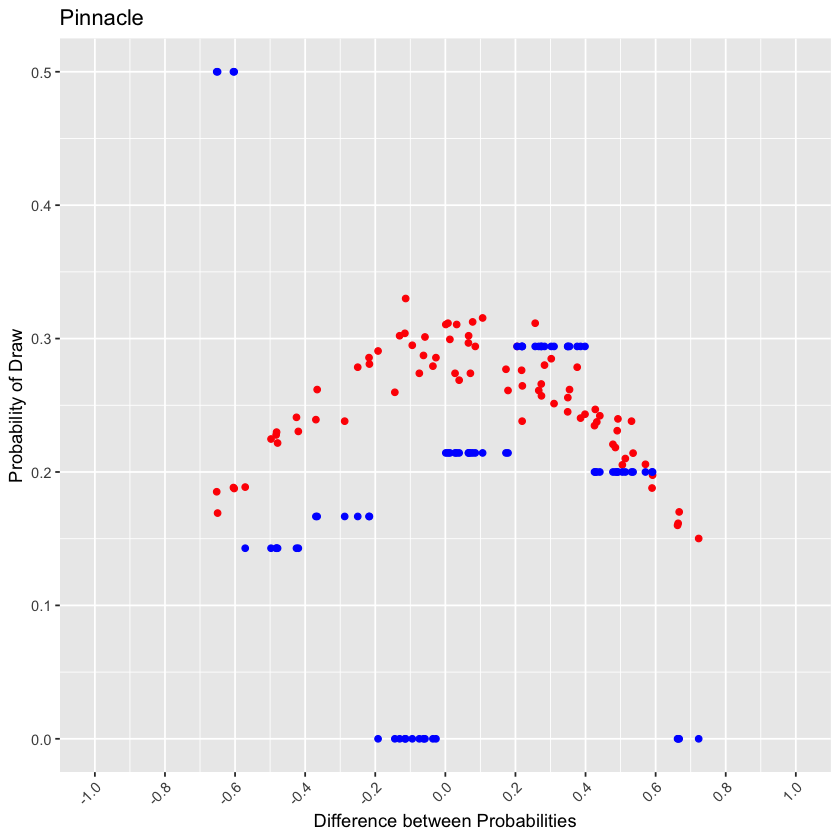

In [23]:
df_Pinnacle$diff=df_Pinnacle$home_prob-df_Pinnacle$away_prob
df_Pinnacle$categ<-to_vec(for(posi in 1:78) for(i in a) 
  if(i>(df_Pinnacle$home_prob[posi]-df_Pinnacle$away_prob[posi]) && 
     i<=(df_Pinnacle$home_prob[posi]-df_Pinnacle$away_prob[posi]+0.2)) as.integer((i+1)/0.2)-1)

df_Pinnacle[categ==0, bins:=determined_bins[1]]
df_Pinnacle[categ==1, bins:=determined_bins[2]]
df_Pinnacle[categ==2, bins:=determined_bins[3]]
df_Pinnacle[categ==3, bins:=determined_bins[4]]
df_Pinnacle[categ==4, bins:=determined_bins[5]]
df_Pinnacle[categ==5, bins:=determined_bins[6]]
df_Pinnacle[categ==6, bins:=determined_bins[7]]
df_Pinnacle[categ==7, bins:=determined_bins[8]]
df_Pinnacle[categ==8, bins:=determined_bins[9]]
df_Pinnacle[categ==9, bins:=determined_bins[10]]

df_Pinnacle[FTR=="D",draw:=1]
df_Pinnacle[FTR=="H",draw:=0]
df_Pinnacle[FTR=="A",draw:=0]
determined_bins <- factor(c( "(-1, -0.8]", "(-0.8, -0.6]", "(-0.6, -0.4]","(-0.4, -0.2]",
                             "(-0.2, 0]","(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]", "(0.8, 1]"),
                          levels = c( "(-1, -0.8]", "(-0.8, -0.6]", "(-0.6, -0.4]","(-0.4, -0.2]",
                                      "(-0.2, 0]","(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]", "(0.8, 1]"),
                          ordered = T)
df_Pinnacle[,real_draw_prob:=mean(draw),by=categ]
#table(df_Pinnacle$bins,df_Pinnacle$draw)
ggplot(df_Pinnacle,aes(x=diff,y=draw_prob))+geom_point(color="red")+                        
  labs(x="Difference between Probabilities",y="Probability of Draw")+ggtitle("Pinnacle")+ 
  geom_point(aes(x=diff, y=real_draw_prob),color="blue") + theme(axis.text.x = element_text(angle = 45,hjust = 1))+
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10),limits=c(-1,1))

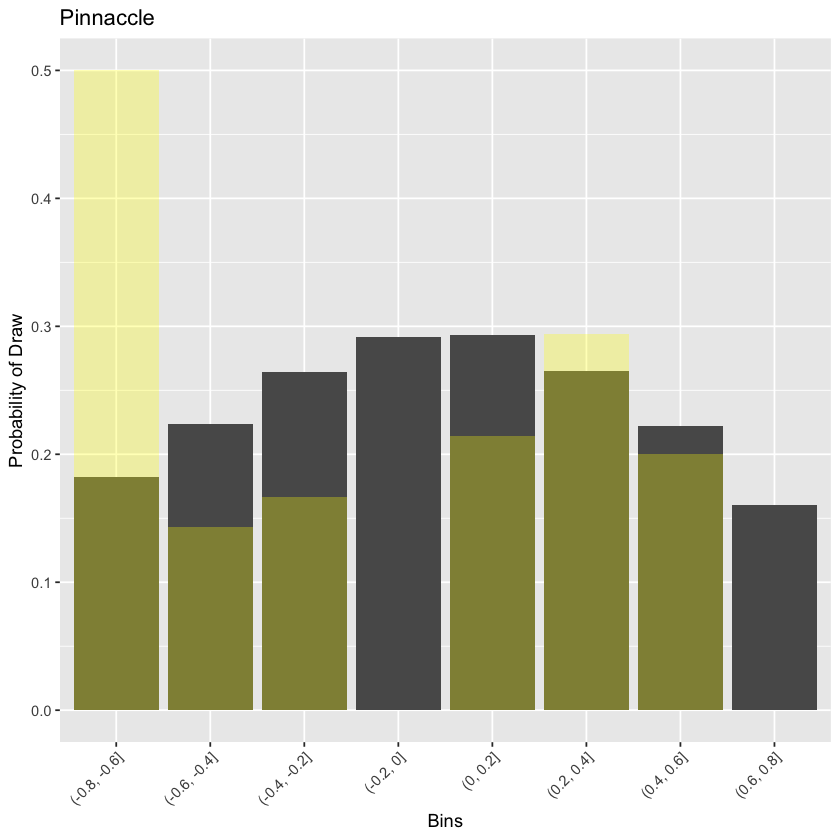

In [24]:
ggplot(df_Pinnacle,aes(x=bins,y=draw_prob))+ stat_summary(fun.y="mean", geom="bar")+
  labs(x="Bins",y="Probability of Draw")+ggtitle("Pinnaccle")+
  geom_bar(aes(x=bins, y=real_draw_prob),stat = "summary", fun.y = "mean",
           fill="yellow",alpha=.3) + theme(axis.text.x = element_text(angle = 45,hjust = 1))

For each bookmaker, bias is existing. In general, biases are observed in (-0.8, -0.6] and (-0.6, -0.4] bins. These 2 bins' values are too similar and this difference can be caused by experts deciding probabilities in the bookmakers. 2 bookmakers, Bet 365 & Pinnacle, have a bias in (-0.8, -0.6], and the other 2 bookmakers, Bet and Win & IW, have a bias in (-0.6, -0.4]. So, profit can be achieved by betting proper matches.

# Task 3

## Part 1

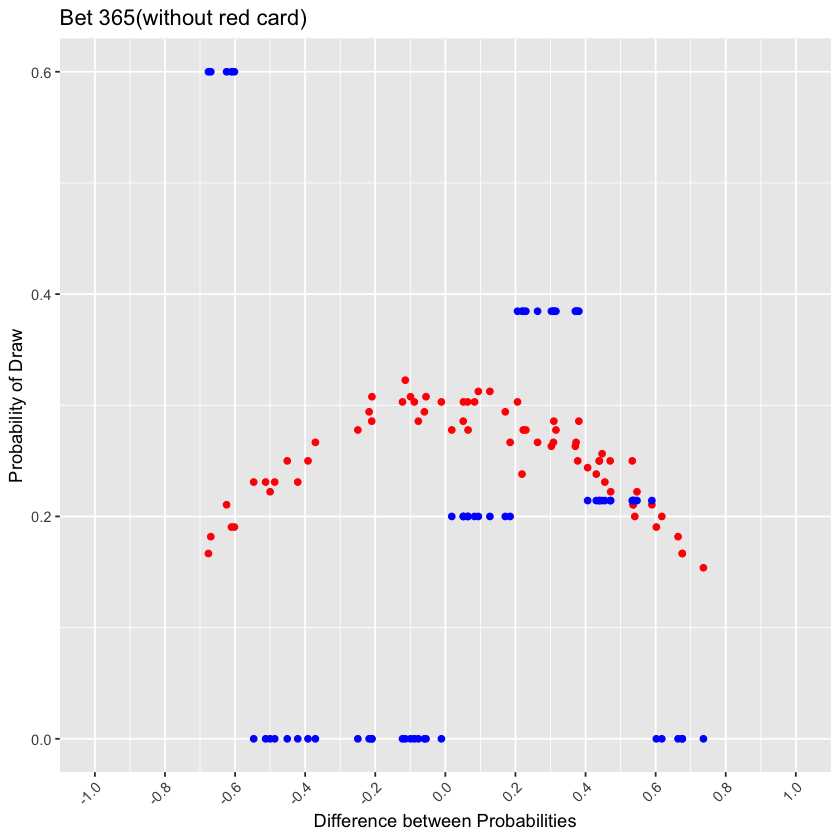

In [150]:
df_Bet365_wt_red=df_Bet365[HR!=1&AR!=1]
df_Bet365_wt_red[,real_draw_prob:=mean(draw),by=categ]
ggplot(df_Bet365_wt_red,aes(x=diff,y=draw_prob))+geom_point(color="red")+                        
  labs(x="Difference between Probabilities",y="Probability of Draw")+ggtitle("Bet 365(without red card)")+
  geom_point(aes(x=diff, y=real_draw_prob),color="blue") + theme(axis.text.x = element_text(angle = 45,hjust = 1))+
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10),limits=c(-1,1))

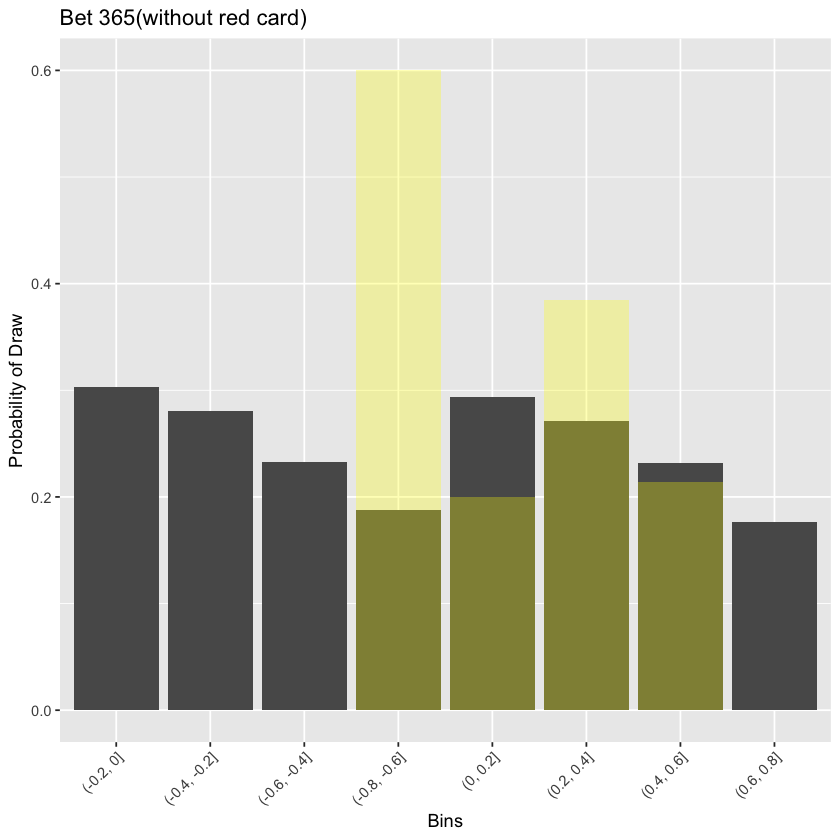

In [128]:
ggplot(df_Bet365_wt_red,aes(x=bins,y=draw_prob))+ stat_summary(fun.y="mean", geom="bar")+
  labs(x="Bins",y="Probability of Draw")+ggtitle("Bet 365(without red card)")+
  geom_bar(aes(x=bins, y=real_draw_prob),stat = "summary", fun.y = "mean",
           fill="yellow",alpha=.3) + theme(axis.text.x = element_text(angle = 45,hjust = 1))

After removing the red cards, still there is a bias in the previously determined bin. Again, profit can be achieved in long run by betting matches in this bin.

## Part 2

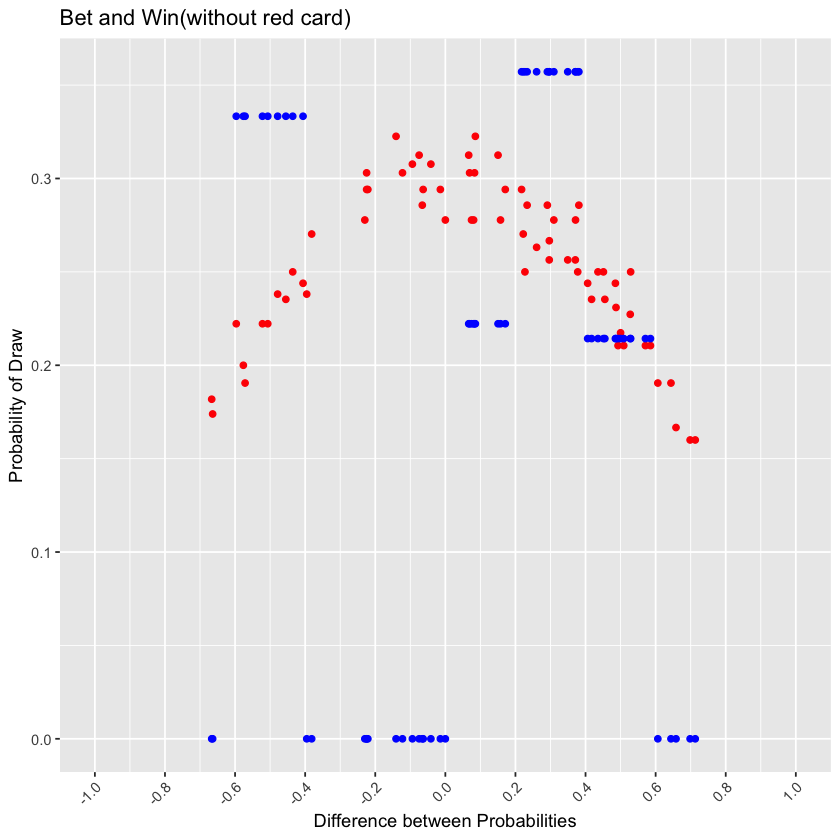

In [151]:
df_BetAndWin_wt_red=df_BetAndWin[HR!=1&AR!=1]
df_BetAndWin_wt_red[,real_draw_prob:=mean(draw),by=categ]
ggplot(df_BetAndWin_wt_red,aes(x=diff,y=draw_prob))+geom_point(color="red")+                        
  labs(x="Difference between Probabilities",y="Probability of Draw")+ggtitle("Bet and Win(without red card)")+ 
  geom_point(aes(x=diff, y=real_draw_prob),color="blue") + theme(axis.text.x = element_text(angle = 45,hjust = 1))+
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10),limits=c(-1,1))

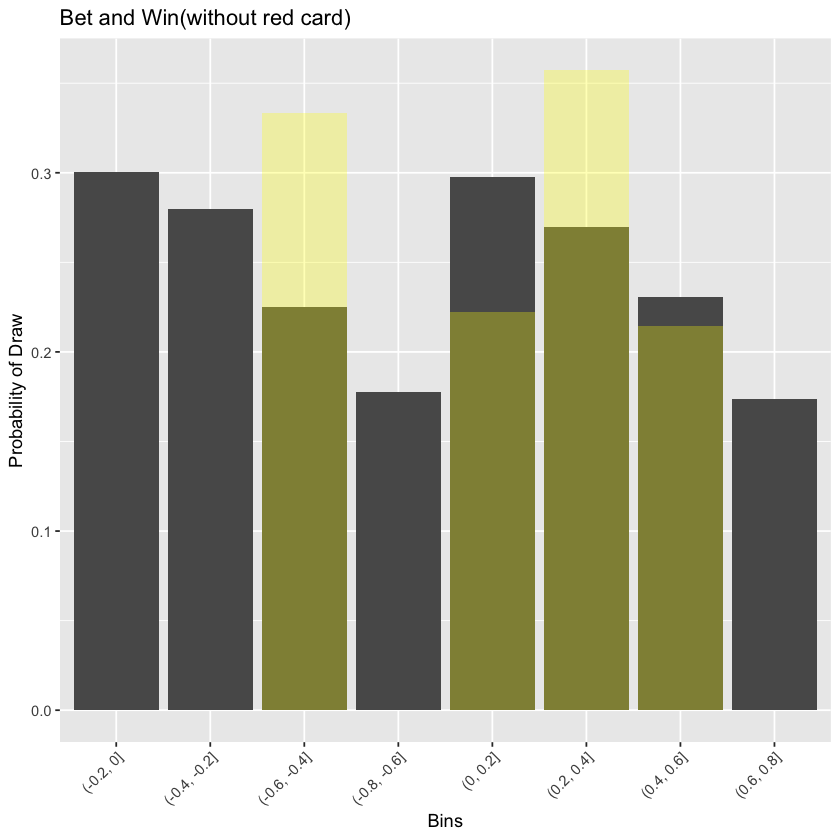

In [129]:
ggplot(df_BetAndWin_wt_red,aes(x=bins,y=draw_prob))+ stat_summary(fun.y="mean", geom="bar")+
  labs(x="Bins",y="Probability of Draw")+ggtitle("Bet and Win(without red card)")+
  geom_bar(aes(x=bins, y=real_draw_prob),stat = "summary", fun.y = "mean",
           fill="yellow",alpha=.3) + theme(axis.text.x = element_text(angle = 45,hjust = 1))

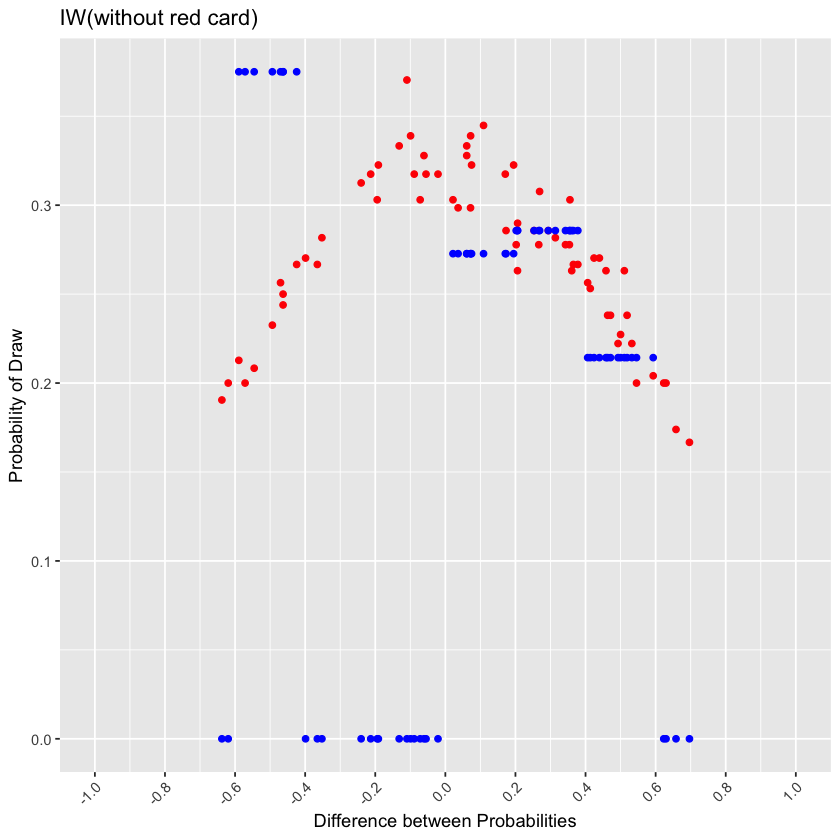

In [152]:
df_IW_wt_red=df_IW[HR!=1&AR!=1]
df_IW_wt_red[,real_draw_prob:=mean(draw),by=categ]
ggplot(df_IW_wt_red,aes(x=diff,y=draw_prob))+geom_point(color="red")+                        
  labs(x="Difference between Probabilities",y="Probability of Draw")+ggtitle("IW(without red card)")+ 
  geom_point(aes(x=diff, y=real_draw_prob),color="blue") + theme(axis.text.x = element_text(angle = 45,hjust = 1))+
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10),limits=c(-1,1))

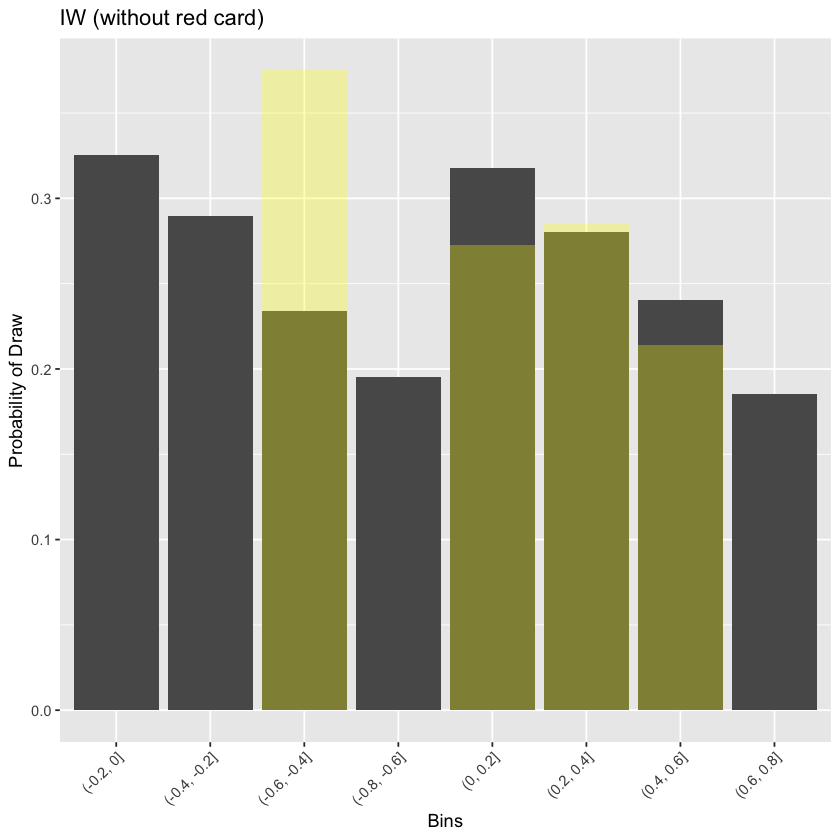

In [130]:
ggplot(df_IW_wt_red,aes(x=bins,y=draw_prob))+ stat_summary(fun.y="mean", geom="bar")+
  labs(x="Bins",y="Probability of Draw")+ggtitle("IW (without red card)")+
  geom_bar(aes(x=bins, y=real_draw_prob),stat = "summary", fun.y = "mean",
           fill="yellow",alpha=.3) + theme(axis.text.x = element_text(angle = 45,hjust = 1))

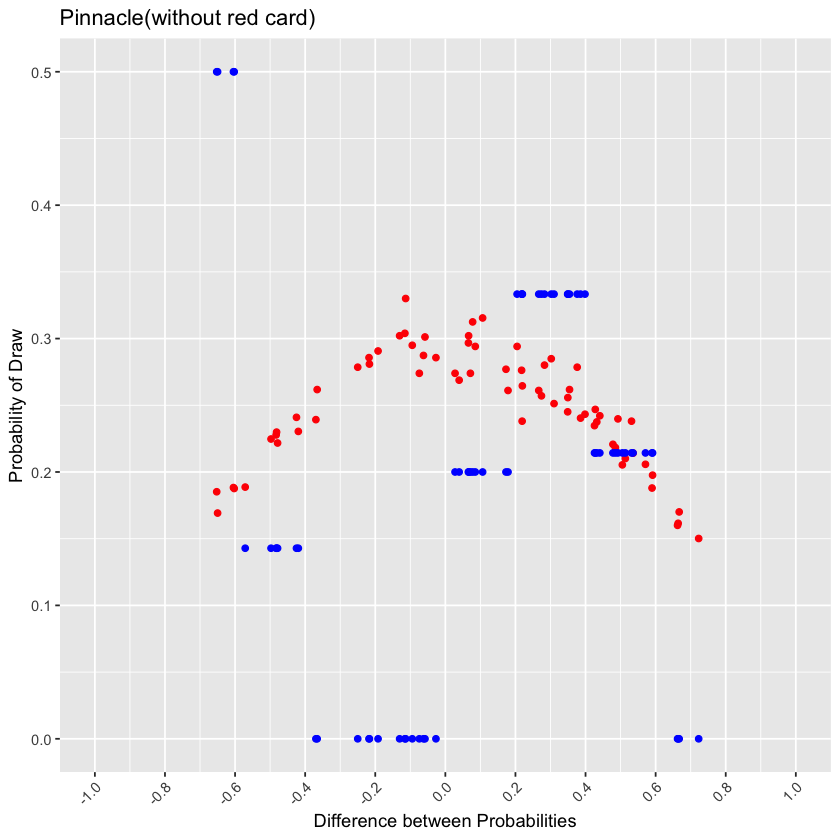

In [153]:
df_Pinnacle_wt_red=df_Pinnacle[HR!=1&AR!=1]
df_Pinnacle_wt_red[,real_draw_prob:=mean(draw),by=categ]
ggplot(df_Pinnacle_wt_red,aes(x=diff,y=draw_prob))+geom_point(color="red")+                        
  labs(x="Difference between Probabilities",y="Probability of Draw")+ggtitle("Pinnacle(without red card)")+ 
  geom_point(aes(x=diff, y=real_draw_prob),color="blue") + theme(axis.text.x = element_text(angle = 45,hjust = 1))+
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10),limits=c(-1,1))

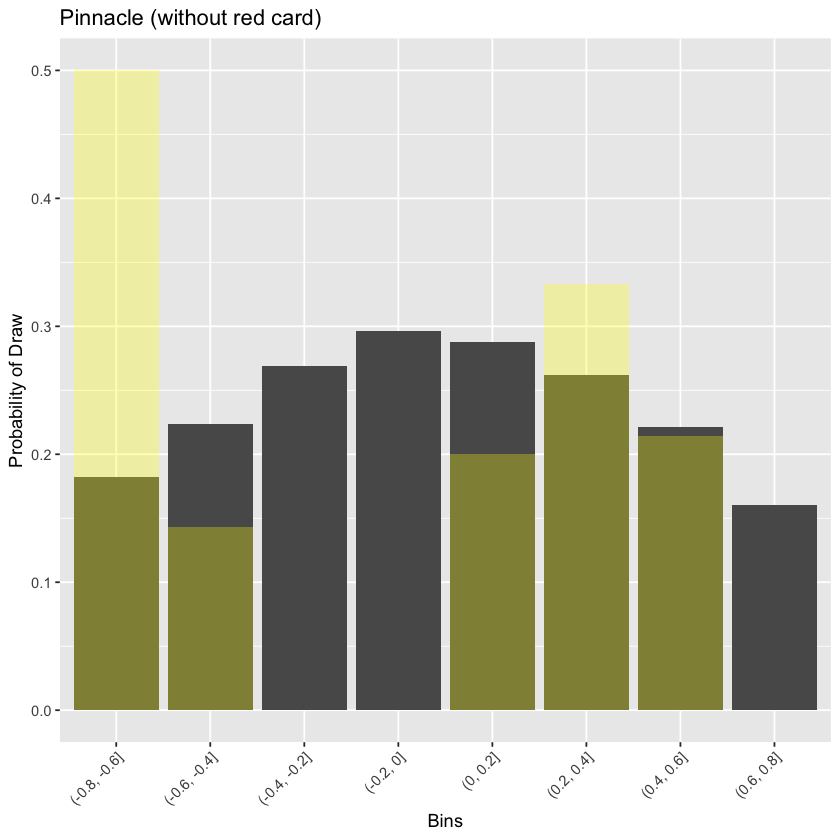

In [131]:
ggplot(df_Pinnacle_wt_red,aes(x=bins,y=draw_prob))+ stat_summary(fun.y="mean", geom="bar")+
  labs(x="Bins",y="Probability of Draw")+ggtitle("Pinnacle (without red card)")+
  geom_bar(aes(x=bins, y=real_draw_prob),stat = "summary", fun.y = "mean",
           fill="yellow",alpha=.3) + theme(axis.text.x = element_text(angle = 45,hjust = 1))

Again, biases are existing for each bookmaker after removing the matches with red cards. So, it can be said that actual draw probability for matches in determining bins have biases. And profit in long run can be obtained by betting these matches.